In [3]:
pip install pandasql


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26768 sha256=11cedf5ec4cdf00bd471aaecee152090db3e7d758753e36b1b650f0bdf568fe4
  Stored in directory: c:\users\kpnar\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
from pandasql import sqldf
import pandasql as ps
import seaborn 
mysql = lambda q: sqldf(q, globals())
import re

In [2]:
#Reading the dataset
xls=pd.ExcelFile("HospitalDatabase.xlsx")

#Reading the patients Sheet

df_PA=pd.read_excel(xls,'Patients')

# Reading the EDVisit Sheet

df_EDV=pd.read_excel(xls,'EDVisits')

# Reading the AmbulatoryVisits sheet
 df_AV = pd.read_excel(xls,'AmbulatoryVisits')

    
#Reading the ReAdmissionRegistry 
 df_RE=pd.read_excel(xls,'ReAdmissionRegistry')

#Reading the Discharges sheet
  df_D=pd.read_excel(xls,'Discharges')

#Reading the Providers sheet
df_P=pd.read_excel(xls,'Providers')

#Reading the EDUnique sheet
df_E=pd.read_excel(xls,' EDUnique')

    
    
    


IndentationError: unexpected indent (1581504745.py, line 13)

# 61.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [86]:
A = np.arange(1,31)
B = A.reshape(6, 5)
print(B)
B[2:4,0:2]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


array([[11, 12],
       [16, 17]])

# 80.Display the data for all 'White Female' patients above the age of 50.   

In [17]:
#xls=pd.ExcelFile("HospitalDatabase.xlsx")
#df_PA=pd.read_excel(xls,'Patients')

df_PA[(df_PA.Race == 'White') 
      & (df_PA.Gender == 'Female') 
      & (df_PA.DateOfBirth.dt.year < (datetime.today().year-50))]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
25,26,Sally,Bing,1972-08-03 00:05:39.560,Female,White,Spanish
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish
...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English


# #63.List male patients over the age of 60 who have undergone surgery from January-March 2019.


In [62]:
Pva = pd.merge(df_AV, df_P, on = "ProviderID")
avpa = pd.merge(df_PA, Pva, left_on="PatientID", right_on="PatientMRN")
avpa[(avpa.Gender == 'Male')
    & (avpa.DateOfBirth.dt.year < (datetime.today().year-60))
    & (avpa.ProviderSpecialty == 'Surgery')
    & (avpa.DateScheduled.dt.year == 2019)
    & (avpa.DateScheduled.dt.month >= 1)
    & (avpa.DateScheduled.dt.month <= 3)]

NameError: name 'df_AV' is not defined

## 75.Using numpy functions, multiply the following arrays                     a=np.arange(6).reshape(2,3)                                                                            b=np.arange(6).reshape(3,2)

In [29]:

a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
outarr=np.dot(a,b)
print("result",outarr)

result [[10 13]
 [28 40]]


  # #71.Find the count of White Spanish Male.

In [87]:
len (df_PA[(df_PA['Race']=='White') & (df_PA['Language']=='Spanish') & (df_PA['Gender']=='Male')])


15

# 77.Plot a graph to count the patients based on discharge disposition. 

[Text(0, 0, '104'), Text(0, 0, '577'), Text(0, 0, '39')]

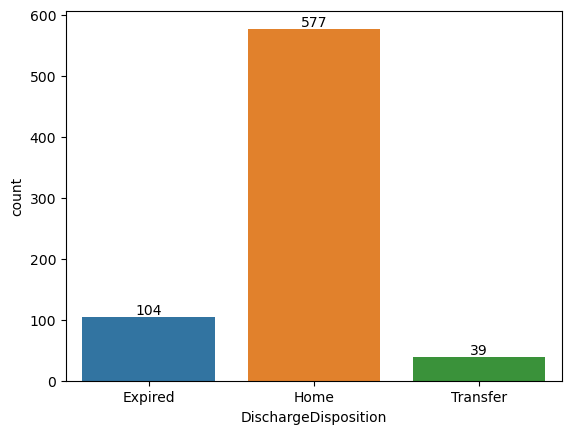

In [10]:
xls=pd.ExcelFile("HospitalDatabase.xlsx")
df_D = pd.read_excel(xls, 'Discharges')
#plot the chart
A=sns.countplot(data = df_D,x = 'DischargeDisposition')
#assign labels
A.bar_label(A.containers[0])

# #68.Calculate average LOS.

In [11]:
df_RA = pd.read_excel(xls, 'ReAdmissionRegistry')
#mean() calculates the average
A=df_RA["ExpectedLOS"].mean()
print("Average Length of Stay=")
print(A)

Average Length of Stay=
8.824589159156156


# #69.Number of patients on 'Transfer' based on primary diagnosis.

In [12]:
#Reading the ReAdmissionRegistry Sheet
df_RA = pd.read_excel(xls, 'ReAdmissionRegistry')

#creating a temporary dataframe with constraints of 'Transfer' and 'Stroke' as primary diagnosis
temp_df1 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Stroke')]
print("%s%s" % ('Number Of Patients for Stroke : ',  len(temp_df1.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Heart Failure' as primary diagnosis
temp_df2 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis']=='Heart Failure')]
print("%s%s" % ('Number Of Patients for Heart Failure : ',  len(temp_df2.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Knee Replacement' as primary diagnosis
temp_df3 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Knee Replacement')] 
print("%s%s" % ('Number Of Patients for Knee Replacement : ',  len(temp_df3.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Laceration' as primary diagnosis
temp_df4 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Laceration')] 
print("%s%s" % ('Number Of Patients for Knee Replacement : ',  len(temp_df4.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Pain' as primary diagnosis
temp_df5 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Pain')] 
print("%s%s" % ('Number Of Patients for Pneumonia : ',  len(temp_df5.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Pneumonia' as primary diagnosis
temp_df6 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Pneumonia')] 
print("%s%s" % ('Number Of Patients for Pneumonia : ',  len(temp_df6.index)))

Number Of Patients for Stroke : 9
Number Of Patients for Heart Failure : 9
Number Of Patients for Knee Replacement : 1
Number Of Patients for Knee Replacement : 1
Number Of Patients for Pneumonia : 1
Number Of Patients for Pneumonia : 8


# #65.Plot a graph showing the count of patients for the reason visited the hospital.

[Text(0, 0, '411.118'),
 Text(0, 0, '406.981'),
 Text(0, 0, '400.018'),
 Text(0, 0, '392.871'),
 Text(0, 0, '389.706'),
 Text(0, 0, '409.045'),
 Text(0, 0, '398.103'),
 Text(0, 0, '404.832'),
 Text(0, 0, '397.312'),
 Text(0, 0, '447.538'),
 Text(0, 0, '387.5'),
 Text(0, 0, '425'),
 Text(0, 0, '90')]

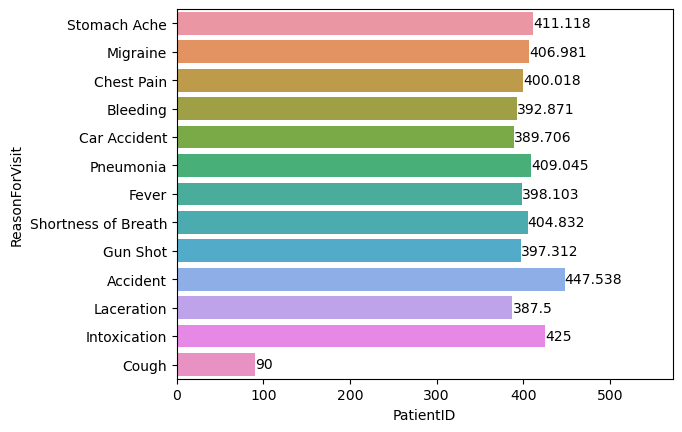

In [13]:
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
df_EDV['NumberOfPatients'] = 1
df_EDV.groupby(['ReasonForVisit'])['NumberOfPatients'].count().reset_index()
#plot the bar chart
A = sns.barplot(data=df_EDV,x='PatientID', y= 'ReasonForVisit', errwidth=0)
#assign labels
A.bar_label(A.containers[0])

# #79.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [14]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

df_D['diff_days'] = (df_D['DischargeDate'] - df_D['AdmissionDate']) / np.timedelta64(1, 'D')

pivot = df_D.pivot_table(index=['Service', 'PrimaryDiagnosis'], values=['diff_days'], aggfunc='mean')
print(pivot)

                                     diff_days
Service          PrimaryDiagnosis             
Cardiology       AMI                 10.743253
                 Afib                11.696580
                 Broken Leg          10.947355
                 Flu                 12.422469
                 Heart Failure        9.939645
                 Kidney Failure       4.677856
General Medicine Broken Leg          13.251505
                 Diabetes            10.836104
                 Fever                8.469869
                 Flu                 10.418172
                 Hypertension         9.487165
                 Kidney Failure      11.190868
                 Laceration           9.951947
                 Pneumonia            9.884497
                 Stroke              11.760999
Hospitalist      AMI                 10.021201
                 Broken Leg           8.276967
                 Diabetes             9.323806
                 Fever               10.910405
             

# #78.Display total count of patients service wise based on gender.

In [15]:
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

df_new_D = df_D[['PatientID', 'Service']]
#df_new_D

df_new_P = df_PA[['PatientID', 'Gender']]
#df_new_P

result =  pd.merge(df_new_D, df_new_P)


#display(result)
headers =  ["PatientID", "Service","Gender"]
display.columns = headers
#display


pivot = result.pivot_table(index=['Service','Gender'], values=['PatientID'], aggfunc='count')
print(pivot)

                         PatientID
Service          Gender           
Cardiology       Female         41
                 Male           54
General Medicine Female        114
                 Male          149
Hospitalist      Female         35
                 Male           66
ICU              Female         65
                 Male           86
Neurology        Female         34
                 Male           31
Orthopeadics     Female         22
                 Male           23


# #64.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [16]:
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')

   
df_new = df_P['ProviderName'].str.split(expand=True)
# adding headers to column in data frame 
headers =  ["First Name", "Last Name"]
df_new.columns = headers
df_new 

,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


# #67.Make a pivot table by the no. of patients from the admission date till discharge date.

In [27]:
 df_RE=pd.read_excel(xls,'ReAdmissionRegistry')
df_RE['_DischargeDate'] = df_RE['DischargeDate'].dt.date
pd.pivot_table(df_RE, index=['AdmissionDate', '_DischargeDate'], values='PatientID', aggfunc='count')

PatientID
AdmissionDate _DischargeDate           
2018-01-01    2018-01-04              3
              2018-01-05              2
              2018-01-06              1
              2018-01-07              3
              2018-01-08              1
...                                 ...
2018-02-22    2018-03-05              1
              2018-03-06              1
              2018-03-07              4
              2018-03-08              2
              2018-03-10              2

[459 rows x 1 columns]

# #72.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [28]:
df_D.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(np.ptp).idxmax()

'Pneumonia'

# #70.Violin plot for Level of Acuity by Visit Reason 

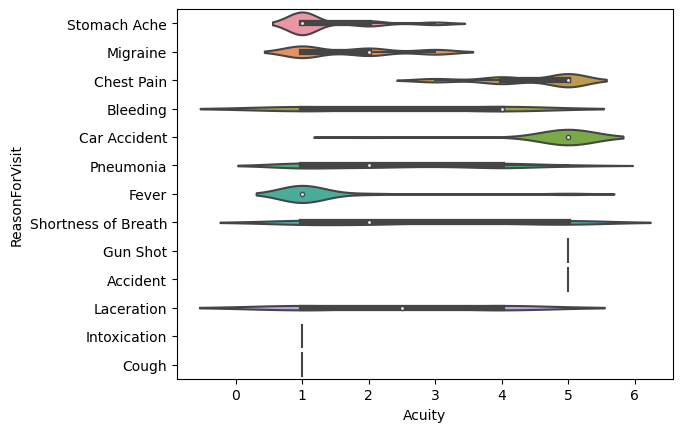

In [18]:
xls=pd.ExcelFile("HospitalDatabase.xlsx")
df_EDV= pd.read_excel(xls, 'EDVisits')
sns.violinplot(data=df_EDV,x='Acuity', y= 'ReasonForVisit', size=0)
plt.show()

# #62.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [6]:
xls=pd.ExcelFile("HospitalDatabase.xlsx")
#Read EDVisits sheet with selected columns
df_EDV= pd.read_excel(xls, 'EDVisits',usecols=['Acuity', 'EDDisposition','PatientID'])

#set the index to the 2 columns
df_EDV = df_EDV.set_index(['Acuity','EDDisposition'])

#To show the indices as acuity and EDDisposition
print("Original Dataframe with index changed:\n",df_EDV)

#count of number of patients as value
df_EDV['count'] = df_EDV.groupby(['PatientID'])['PatientID'].transform('count')

#Display modified DataFrame
print("Modified DataFrame:\n",df_EDV)

Original Dataframe with index changed:
                       PatientID
Acuity EDDisposition           
1      Admitted               1
2      Admitted              12
3      Admitted              13
       Admitted              14
       Admitted              15
...                         ...
4      Discharged           929
1      Discharged           932
       Discharged           933
       Discharged           934
       Discharged           935

[1199 rows x 1 columns]
Modified DataFrame:
                       PatientID  count
Acuity EDDisposition                  
1      Admitted               1      3
2      Admitted              12      2
3      Admitted              13      2
       Admitted              14      2
       Admitted              15      2
...                         ...    ...
4      Discharged           929      1
1      Discharged           932      1
       Discharged           933      1
       Discharged           934      1
       Discharged           93